This code aims at visualising flight data by Python.

Matplotlib,Pandas and Numpy are used.

Basemap.drawgreatcircle() function is used to simulate the air route, but it's not the real trajectory.


Prediction:
1. Airlines will be dense between continents since other transport except ships can't bring people pass through lake.
2. There will be cluster between nations and resorts.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from mpl_toolkits.basemap import Basemap

In [2]:
import pandas as pd

In [3]:
CSV_COLS = ('dep_lat', 'dep_lon', 'arr_lat', 'arr_lon','nb_flights', 'CO2')
routes = pd.read_csv('data.csv', names=CSV_COLS,na_values=['\\N'],sep=';', skiprows=1)
num_routes = len(routes.index)

routes.head(3)
#get data from csv file

,dep_lat,dep_lon,arr_lat,arr_lon,nb_flights,CO2
0,33.50472,126.4931,37.55833,126.7906,88,103.555930
1,37.55833,126.7906,33.50472,126.4931,84,99.492429
2,-37.67333,144.8433,-33.94611,151.1772,83,79.571319


In [4]:
n = routes['nb_flights'].max()

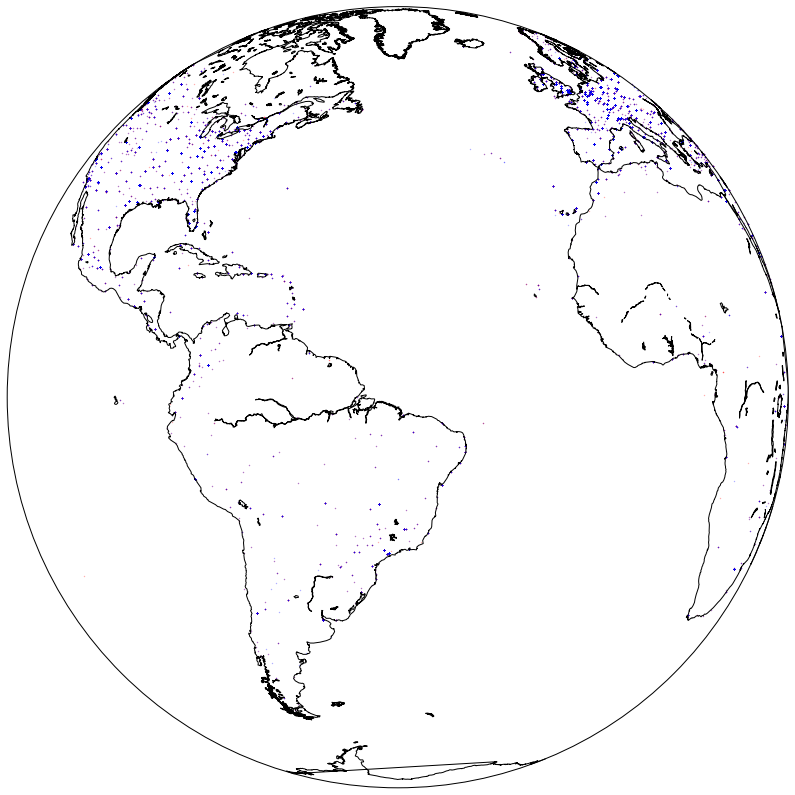

In [5]:
#plot departure and arriving coordinates

plt.figure(figsize=(20, 14))
markersize = .5
markertype = '.'
markeralpha = .4
map = Basemap(projection='ortho',lat_0=0,lon_0=-45,resolution='l')

map.drawcoastlines()


x1,y1=map(routes.dep_lon.values,routes.dep_lat.values)
x2,y2=map(routes.arr_lon.values,routes.arr_lat.values)


map.scatter(x1,y1,markersize, marker=markertype, color='red', alpha=markeralpha)
map.scatter(x2,y2,markersize, marker=markertype, color='blue', alpha=markeralpha)

plt.show()

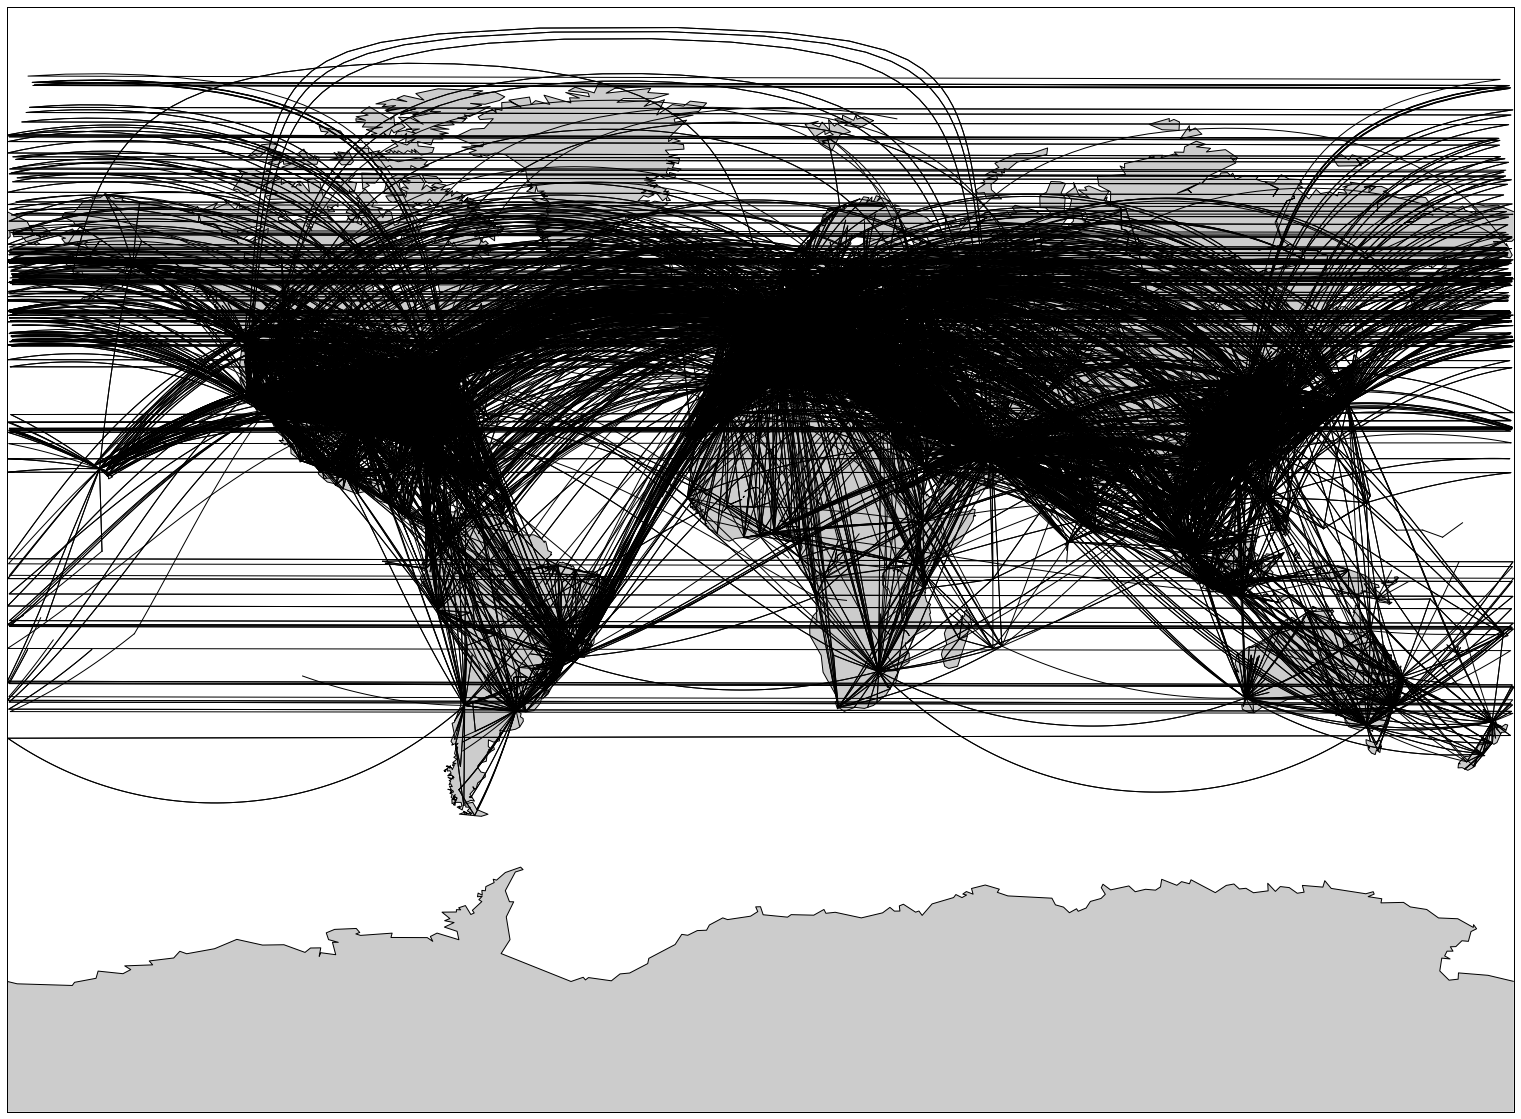

In [6]:
#plot routes
plt.figure(figsize=(27, 20))
m = Basemap(projection='mill', lon_0=0)
    
m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()


for i, route in enumerate(routes.sort_values(by='nb_flights',ascending=True).iterrows()):
    route = route[1]

    m.drawgreatcircle(route['dep_lon'], route['dep_lat'],route['arr_lon'], route['arr_lat'],color='black')
   
plt.show()

Problems of visualisation above:
1. There are parallel lines cross the map.
2. The visualisation isn't clear enough.

For better outcomes:
1. To avoid straight lines interact with graph edges.
2. Use a black background instead.

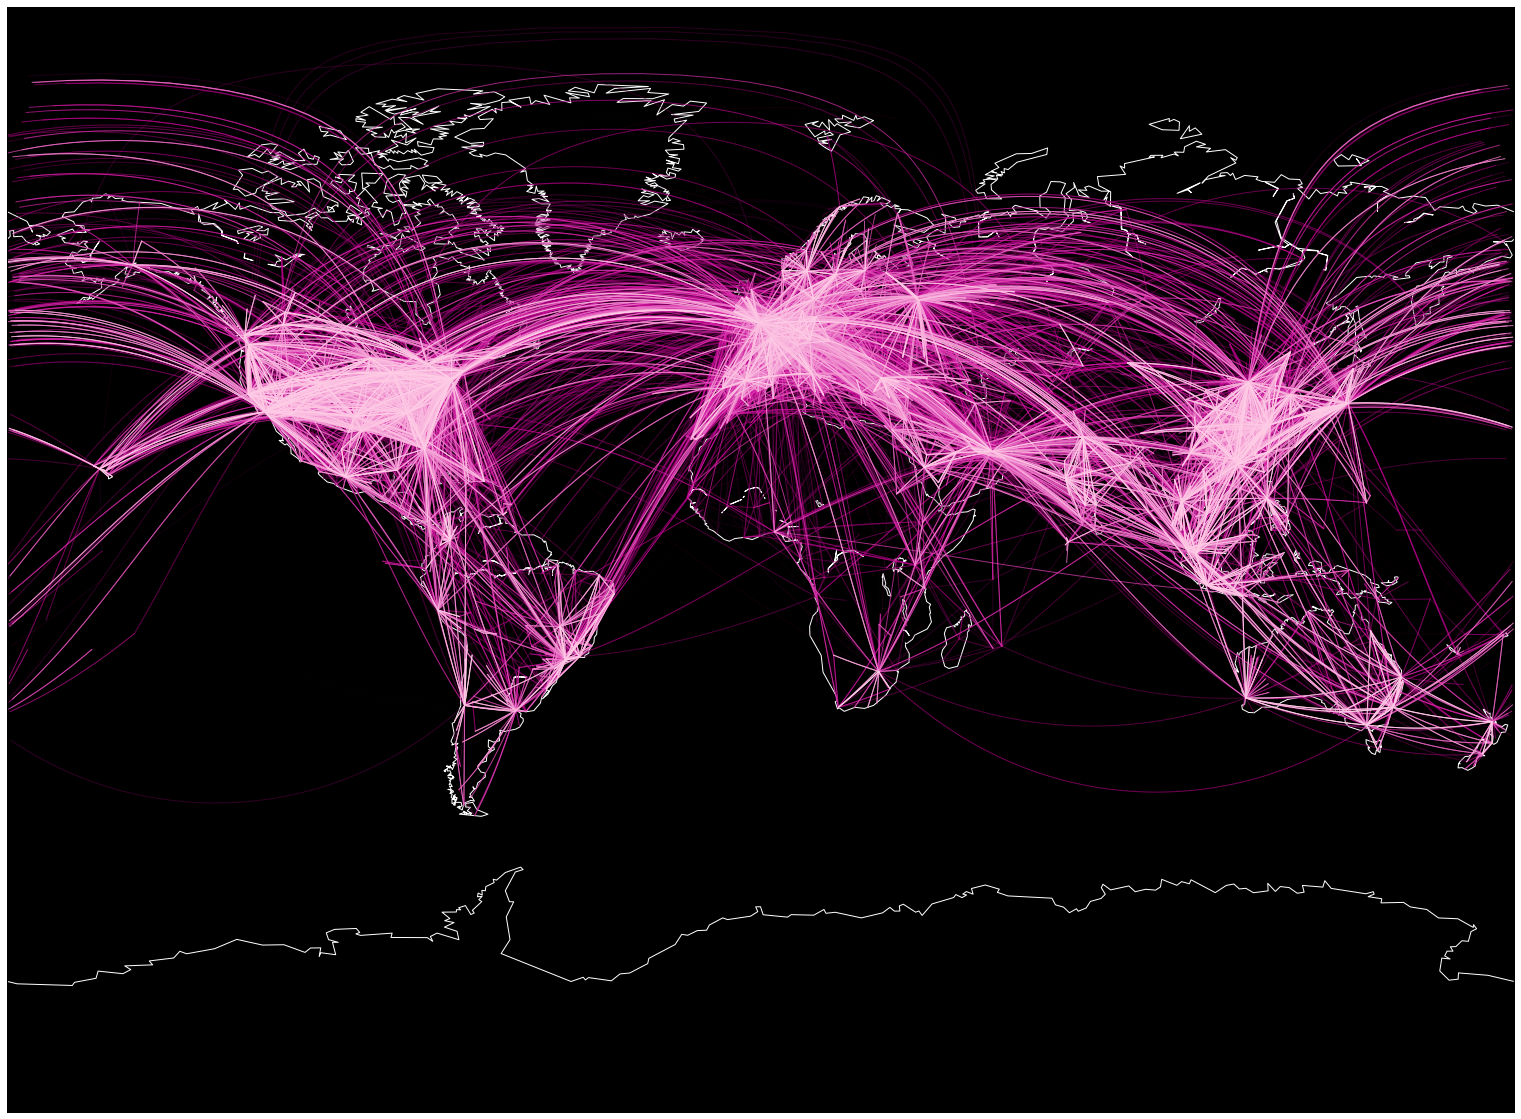

In [7]:
from matplotlib.colors import LinearSegmentedColormap
color_list = [(0.0, 0.0, 0.0, 0.0),(204/255.0, 0, 153/255.0, 0.6),(255/255.0, 204/255.0, 230/255.0, 1.0)]
cmap = LinearSegmentedColormap.from_list('cmap_flights', color_list,N=n)
#matplotlib.colors.LinearSegmentedColormap
#https://matplotlib.org/devdocs/api/_as_gen/matplotlib.colors.LinearSegmentedColormap.html

plt.figure(figsize=(27, 20))
m = Basemap(projection='mill', lon_0=0)
    
m.drawcoastlines(color='white')
m.fillcontinents(color='black',lake_color='black')
m.drawmapboundary(fill_color='black')

# plot each route with its color depending on the number of flights
for i, route in enumerate(routes.sort_values(by='nb_flights',
                              ascending=True).iterrows()):
    route = route[1]

    color = cmap(i * 1.0 / num_routes)

    line, = m.drawgreatcircle(route['dep_lon'], route['dep_lat'],route['arr_lon'], route['arr_lat'],color=color)
        
    path = line.get_path()
    cut_point, = np.where(np.abs(np.diff(path.vertices[:, 0])) > 30000e3)
    #If a line is 30km longer, 
    if len(cut_point) > 0:
        cut_point = cut_point[0]
        vertices = np.concatenate([path.vertices[:cut_point, :],[[np.nan, np.nan]],path.vertices[cut_point+1:, :]])
        path.codes = None
        path.vertices = vertices

plt.show()

Tring to understand this visualisation, I combined the simulated routes to a real world map.

![world map](https://github.com/mmeagher/ARC6818-2017/blob/master/images/Yuyu_Liu_5.png?raw=true"world map")


It shows some point like I predict before, for example, there are clusters between Hawaii (as a holiday resort) and America, over North Atlantic Ocean as well since plane is the best option for long distance transport.
In addtion, USA, UK along with Europe, and China seemed to have more dense airlines due to development of economic. 

References:

https://blog.hugo-larcher.com/flight-data-visualisation-with-pandas-and-matplotlib-ebbd13038647